In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import os

In [132]:
os.chdir('C:\\Users\\bkash\\Desktop\\Jupyter files\\Titanic')
print(os.getcwd())

C:\Users\bkash\Desktop\Jupyter files\Titanic


In [144]:
df_train=pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [145]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
u=['Name','PassengerId','Ticket','Cabin']
for i in range(len(u)):
    df_train=df_train.drop(u[i],axis=1)
y_train=df_train['Survived']
x_train=df_train.drop('Survived',axis=1)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [148]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
x_train=pd.get_dummies(x_train, columns=['Pclass','Embarked','Sex'])

In [150]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         714 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Pclass_3    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  Sex_female  891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 34.9 KB


In [151]:
x_train.fillna(x_train.mean(),inplace=True)

In [152]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Pclass_3    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  Sex_female  891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 34.9 KB


In [153]:
model=tf.keras.Sequential([tf.keras.layers.Dense(12,activation=None),
                           tf.keras.layers.Dense(15,activation='relu'),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(13,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.0005),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=2000,batch_size=128)

Epoch 1/2000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.6162
Epoch 2/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.7209 - accuracy: 0.6162
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6150
Epoch 4/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6150
Epoch 5/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6375
Epoch 6/2000
7/7 [

7/7 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8058
Epoch 77/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8070
Epoch 78/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8070
Epoch 79/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.8092
Epoch 80/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8070
Epoch 81/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8081
Epoch 82/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8092
Epoch 83/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8103
Epoch 84/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8058
Epoch 85/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8126
Epoch 86/2000
7/7 [=====

7/7 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8171
Epoch 159/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8159
Epoch 160/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8182
Epoch 161/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8092
Epoch 162/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8182
Epoch 163/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4076 - accuracy: 0.8283
Epoch 164/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8204
Epoch 165/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.8227
Epoch 166/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8227
Epoch 167/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8305
Epoch 168/2000


7/7 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8148
Epoch 241/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8215
Epoch 242/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8238
Epoch 243/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8204
Epoch 244/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8272
Epoch 245/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8171
Epoch 246/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8249
Epoch 247/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8373
Epoch 248/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8215
Epoch 249/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8260
Epoch 250/2000


7/7 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8272
Epoch 323/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8249
Epoch 324/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8238
Epoch 325/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8361
Epoch 326/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8339
Epoch 327/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8316
Epoch 328/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8305
Epoch 329/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8260
Epoch 330/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8328
Epoch 331/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8305
Epoch 332/2000


7/7 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8305
Epoch 405/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8316
Epoch 406/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8395
Epoch 407/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8328
Epoch 408/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8373
Epoch 409/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8339
Epoch 410/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8373
Epoch 411/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8316
Epoch 412/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8350
Epoch 413/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8283
Epoch 414/2000


7/7 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8373
Epoch 487/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8395
Epoch 488/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8260
Epoch 489/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8350
Epoch 490/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8350
Epoch 491/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8283
Epoch 492/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8373
Epoch 493/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8238
Epoch 494/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8361
Epoch 495/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8361
Epoch 496/2000


7/7 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8429
Epoch 568/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8361
Epoch 569/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8350
Epoch 570/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8395
Epoch 571/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8395
Epoch 572/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8361
Epoch 573/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8429
Epoch 574/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8462
Epoch 575/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8373
Epoch 576/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8373
Epoch 577/2000


7/7 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8350
Epoch 650/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8418
Epoch 651/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8485
Epoch 652/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8406
Epoch 653/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8474
Epoch 654/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.8350
Epoch 655/2000
7/7 [==============================] - ETA: 0s - loss: 0.3400 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8373
Epoch 656/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8406
Epoch 657/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8507
Epoch 658/2000
7/7 [==============================] - 0s 3ms/step - loss:

7/7 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8429
Epoch 731/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.8451
Epoch 732/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8384
Epoch 733/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8395
Epoch 734/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8384
Epoch 735/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8328
Epoch 736/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.8429
Epoch 737/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8462
Epoch 738/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.8429
Epoch 739/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8418
Epoch 740/2000


7/7 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8462
Epoch 812/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8418
Epoch 813/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8440
Epoch 814/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8507
Epoch 815/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8429
Epoch 816/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8418
Epoch 817/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8384
Epoch 818/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8440
Epoch 819/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8485
Epoch 820/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8440
Epoch 821/2000


7/7 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.8395
Epoch 893/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8361
Epoch 894/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8496
Epoch 895/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8440
Epoch 896/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8384
Epoch 897/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8474
Epoch 898/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8462
Epoch 899/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8395
Epoch 900/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8429
Epoch 901/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8462
Epoch 902/2000


7/7 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8395
Epoch 974/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8462
Epoch 975/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8530
Epoch 976/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8462
Epoch 977/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8485
Epoch 978/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8485
Epoch 979/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8541
Epoch 980/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8552
Epoch 981/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8451
Epoch 982/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8384
Epoch 983/2000


7/7 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8418
Epoch 1055/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8530
Epoch 1056/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8485
Epoch 1057/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8429
Epoch 1058/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8507
Epoch 1059/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8440
Epoch 1060/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8384
Epoch 1061/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8552
Epoch 1062/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8496
Epoch 1063/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8373
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8597
Epoch 1136/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8462
Epoch 1137/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8451
Epoch 1138/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8530
Epoch 1139/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8474
Epoch 1140/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8462
Epoch 1141/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8608
Epoch 1142/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8462
Epoch 1143/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8496
Epoch 1144/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8474
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8563
Epoch 1216/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8552
Epoch 1217/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8507
Epoch 1218/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8474
Epoch 1219/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8563
Epoch 1220/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8541
Epoch 1221/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8496
Epoch 1222/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8474
Epoch 1223/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8597
Epoch 1224/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8373
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8451
Epoch 1297/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8519
Epoch 1298/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8451
Epoch 1299/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8563
Epoch 1300/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8440
Epoch 1301/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8552
Epoch 1302/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8563
Epoch 1303/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3377 - accuracy: 0.8541
Epoch 1304/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8552
Epoch 1305/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8608
Epoch 

7/7 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8440
Epoch 1378/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8575
Epoch 1379/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8541
Epoch 1380/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8620
Epoch 1381/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8721
Epoch 1382/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8530
Epoch 1383/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8563
Epoch 1384/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8664
Epoch 1385/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8631
Epoch 1386/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8620
Epoch 

7/7 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8608
Epoch 1458/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8575
Epoch 1459/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8620
Epoch 1460/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8519
Epoch 1461/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8563
Epoch 1462/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8575
Epoch 1463/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8653
Epoch 1464/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8485
Epoch 1465/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8575
Epoch 1466/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8586
Epoch 

7/7 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8541
Epoch 1539/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8608
Epoch 1540/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8653
Epoch 1541/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8597
Epoch 1542/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8676
Epoch 1543/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8676
Epoch 1544/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.8575
Epoch 1545/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8575
Epoch 1546/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8563
Epoch 1547/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8597
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8575
Epoch 1619/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8676
Epoch 1620/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8620
Epoch 1621/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8597
Epoch 1622/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8586
Epoch 1623/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8642
Epoch 1624/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8586
Epoch 1625/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8541
Epoch 1626/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8620
Epoch 1627/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8664
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 0.3344 - accuracy: 0.8597
Epoch 1700/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8653
Epoch 1701/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8676
Epoch 1702/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8541
Epoch 1703/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8552
Epoch 1704/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8620
Epoch 1705/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8608
Epoch 1706/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.8575
Epoch 1707/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8732
Epoch 1708/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8563
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8541
Epoch 1780/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8485
Epoch 1781/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8664
Epoch 1782/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8552
Epoch 1783/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8575
Epoch 1784/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8642
Epoch 1785/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8597
Epoch 1786/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8597
Epoch 1787/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8608
Epoch 1788/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8552
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8653
Epoch 1860/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.8653
Epoch 1861/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8698
Epoch 1862/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3227 - accuracy: 0.8620
Epoch 1863/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8608
Epoch 1864/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8563
Epoch 1865/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8687
Epoch 1866/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8698
Epoch 1867/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8642
Epoch 1868/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8608
Epoch 

7/7 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8597
Epoch 1941/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8721
Epoch 1942/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8687
Epoch 1943/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8586
Epoch 1944/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8664
Epoch 1945/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8620
Epoch 1946/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8743
Epoch 1947/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8642
Epoch 1948/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8586
Epoch 1949/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8563
Epoch 

dict_keys(['loss', 'accuracy'])


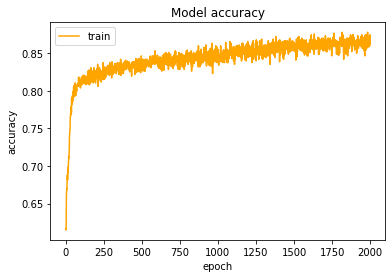

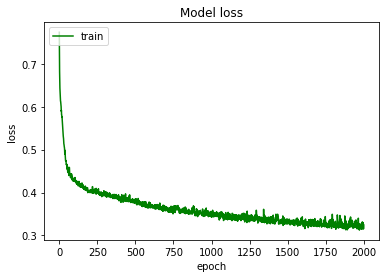

In [154]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],color='orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],color='green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [156]:
preds=model.predict(x_train)
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [157]:
df_test=pd.read_csv('test.csv')
df_test.shape

(418, 11)

In [121]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
def preprocess(data,y_data=None):
    u=['Name','PassengerId','Ticket','Cabin']
    for i in range(len(u)):
        data=data.drop(u[i],axis=1)
    x_data=pd.get_dummies(data, columns=['Pclass','Embarked','Sex'])
    return x_data
x_test=preprocess(df_test)

In [159]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    418 non-null    uint8  
 5   Pclass_2    418 non-null    uint8  
 6   Pclass_3    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
 10  Sex_female  418 non-null    uint8  
 11  Sex_male    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [161]:
x_test.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,0.447368,0.392344,35.627188,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,0.363636,0.636364
std,14.181209,0.896760,0.981429,55.907576,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,0.481622,0.481622
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
x_test.fillna(x_test.mean(),inplace=True)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_1    418 non-null    uint8  
 5   Pclass_2    418 non-null    uint8  
 6   Pclass_3    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
 10  Sex_female  418 non-null    uint8  
 11  Sex_male    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [186]:
def convert(x):
    if x>0.25:
        return 1
    else:
        return 0
k=model.predict(x_test)
lst=[]
for x in k:
    lst.append(convert(x))
lst=np.array(lst)

In [191]:
data={'PassengerId':df_test['PassengerId'],
         'Survived':lst}
predictions=pd.DataFrame(data=data)
predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [195]:
predictions.to_csv('Titanic Predictions.csv')

In [198]:
model.save('Titanic.h5')